In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from warnings import simplefilter
from ipaddress import IPv4Network
import requests
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

simplefilter(action='ignore', category=FutureWarning)

index = 1
dataset = ["tester", "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX"]

df = pd.read_csv("./dataset/MachineLearningCVE/"+dataset[index]+ ".csv")

# if dataset[index] == "tester":
#     df.drop(["Flow ID", " Source IP", " Destination IP", " Timestamp"], axis = 1, inplace = True)





#convert good and bad to numbers
df[" Label"].replace("BENIGN", 0,  inplace = True)
df[" Label"].replace("Bot", 1,  inplace = True)
df[" Label"].replace("DDoS", 2, inplace = True)
df[" Label"].replace("DoS Hulk", 3, inplace = True)
df[" Label"].replace("DoS Slow-httptest", 4, inplace = True)
df[" Label"].replace("FTP-Patator", 5, inplace = True)
df[" Label"].replace("Heartbleed", 6, inplace = True)
df[" Label"].replace("PortScan", 7, inplace = True)
df[" Label"].replace("SSH-Patator", 8, inplace = True)
df[" Label"].replace("DoS GoldenEye", 9, inplace = True)
df[" Label"].replace("DoS slowloris", 10, inplace = True)
df[" Label"].replace("Infiltration", 11, inplace = True)
df[" Label"].replace("Web Attack – Brute Force", 12, inplace = True)
df[" Label"].replace("Web Attack – Sql Injection ",13, inplace = True)
df[" Label"].replace("DoS slowloris", 14, inplace = True)
df= df.replace([np.inf, -np.inf, np.nan, None], -999)


# Define independent variables
factors = df.iloc[ : , :-1].values 



# Define dependent variable
labels=df.iloc[:,-1].values





# check if there are any NAs in dataset
pd.set_option("display.max_rows", None)

# print(df.dtypes)

x_train, x_test, y_train, y_test = train_test_split(factors, labels, test_size = 0.55, random_state = 42)

model = RandomForestClassifier(n_estimators = 10, random_state=30)
model.fit(x_train.astype(np.float64), y_train)
predict = model.predict(x_test)

print("done")


done


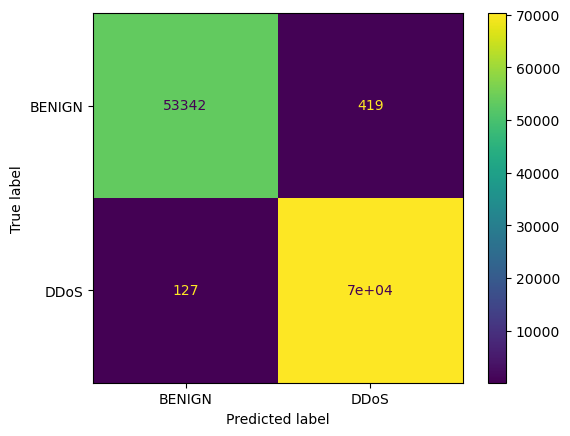

In [129]:
# train the model
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

y_probabilities = clf.predict_proba(x_test)
threshold = .95  # Adjust this threshold as needed
y_pred = (y_probabilities[:,0:1] <= threshold).astype(int)


#get the original list labels
original_labels = ['BENIGN', 'Bot', "DDoS", "DoS Hulk", "DoS Slow-httptest", "FTP-Patator", 
                 "Heartbleed", "PortScan", "SSH-Patator", "DoS GoldenEye", "DoS slowloris", 
                 "Infiltration", "Web Attack – Brute Force", "Web Attack – Sql Injection ",
                 "DoS slowloris"
                ]
# get the ones used in this model
integer_labels = clf.classes_

# create map array
label_mapping  = []

#iterate through the labels used and create map from them
for i in range(len(integer_labels)):
    label_mapping.append(original_labels[integer_labels[i]])


matrix = confusion_matrix( y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=label_mapping)

disp.plot()
plt.show()


In [85]:
print(len(predictions), len(y_pred))

124160 124160 works
